In [1]:
import rioxarray as rxr
from rasterio.plot import plotting_extent
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# open the raster using rioxarray

# In order to plot the raster and vector data together in the same plot, 
#you need to identify the spatial extent of the raster data file so that 
#matplotlib can correctly place the raster data in geographic space.

# you can use the plotting_extent function from rasterio in combination with the data you opened in 
#rioxarray to create the spatial plotting extent for a raster layer

data = rxr.open_rasterio('Rainfall_Muenster_100m.tif', masked=True)
data_plotting_extent = plotting_extent(data[0], data.rio.transform())

In [9]:
# Getting the crs of the raster data
data.rio.crs


CRS.from_dict(init='epsg:25832')

In [3]:
data_plotting_extent

(395091.2589999996, 415715.25100000016, 5744171.395, 5768640.715)

In [4]:
# open the vector data for plot using geopandas
Districts=gpd.read_file(r'D:\USER\seleem\NRW\Muenster\05515000_shp_stadtbezirk\stadtbezirk.shp')

In [5]:
# check CRS of vector Data

#When cropping or overlaying data, it is important to make sure the Coordinate Reference System, or CRS, 
#is the same for the two datasets.


Districts.crs

<Projected CRS: EPSG:25832>
Name: ETRS89 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 6°E and 12°E: Austria; Belgium; Denmark - onshore and offshore; Germany - onshore and offshore; Norway including - onshore and offshore; Spain - offshore.
- bounds: (6.0, 38.76, 12.0, 83.92)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [10]:
# if the raster and the polygon do not have the same projection
# then project the shapefile to the raster

# Transforming the district to the raster data crs
Districts_proj = Districts.to_crs(data.rio.crs)


In [11]:
# Order of Coordinates for Plotting Extent

#rio.bounds is providing the boundary but in another way which is not useful for matplotlib
#therefore it is better to use plotting extent

data.rio.bounds()

(395091.2589999996, 5744171.395, 415715.2510000001, 5768640.715)

In [12]:
data_plotting_extent

(395091.2589999996, 415715.25100000016, 5744171.395, 5768640.715)

In [ ]:
# you can see it is the same values but with different order. 

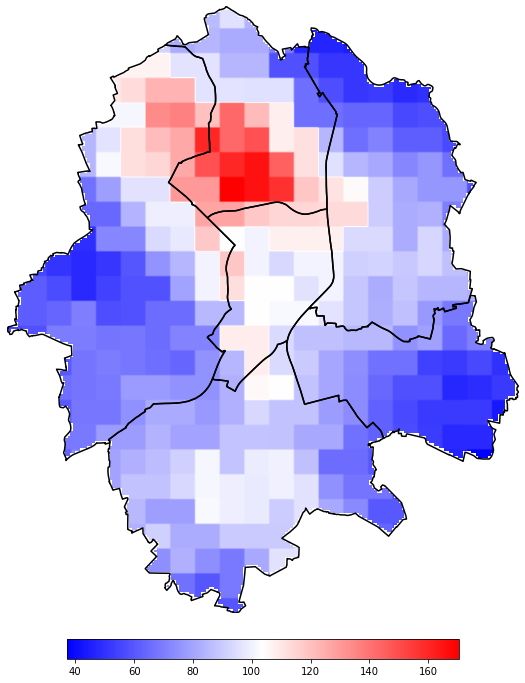

In [52]:
# Plot using rasterio array
# you need to make a hidden image for the color bar
import rasterio as rio
fig, ax = plt.subplots(figsize=(12, 12))

ds=rio.open("Rainfall_Muenster_100m.tif")
arr=ds.read(1)

from rasterio import plot as rasterplot

image_hidden=ax.imshow(arr,cmap="bwr",extent=data_plotting_extent)


rasterplot.show(
    data,  # use tiff.read(1) with your data
    extent=data_plotting_extent,
    ax=ax,cmap="bwr")

Districts.boundary.plot(ax=ax,color="k")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks([])
plt.yticks([])

plt.xlabel("")
plt.ylabel("")

plt.title("")

# add colorbar
fig.colorbar(image_hidden, ax=ax, orientation='horizontal',fraction=0.03,pad=0.04)

plt.show()

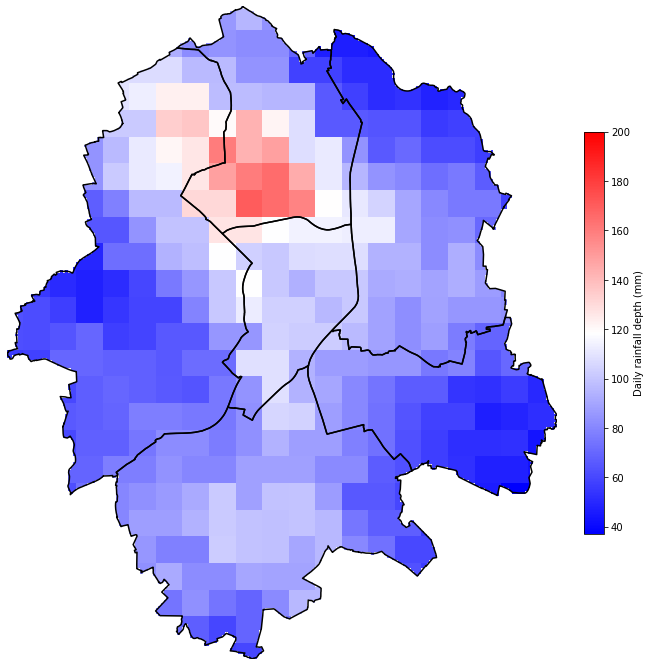

In [40]:
# plot using rioxarray

fig, ax = plt.subplots(figsize=(12, 12))

im=data.squeeze().plot.imshow(ax=ax,cmap="bwr",cbar_kwargs={'label': "Daily rainfall depth (mm)", 
                                                            "fraction":0.03, "pad":0.04}, vmax=200)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
fig.patch.set_visible(False)
#cbar = plt.colorbar(im)
#cbar.ax.tick_params(labelsize=10)
#tick_font_size = 15
#plt.colorbar(im,fraction=0.046, pad=0.04)

# remove the axis label (coordinate)
#ax.set_yticklabels([])
#ax.set_xticklabels([])

plt.xticks([])
plt.yticks([])

plt.xlabel("")
plt.ylabel("")

plt.title("")

Districts.boundary.plot(ax=ax,color="k");
